In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

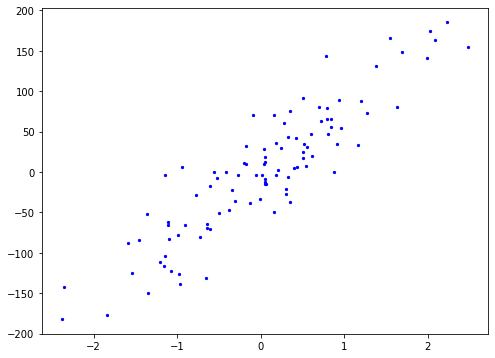

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

# Splits X to X_train and X_test; y to y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# X_train.shape = (80, 1), y_train.shape = (80,) - they are 'true' values
# _test left for learning. _test is 20% of X, y as test_size=0.2

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=5)
plt.show()

##### Learning block

In [4]:
import numpy as np
class LinearRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # X - test parameters 
        # y - true values
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            # X is nx1 matrix
            # np.dot() goes in each row here
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # dL / dw
            # We transpose X to go in columns 
            dw = (1 / n_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    
    # X is nx1 matrix. X.shape = (20, 1)
    # So predict returns (20,) (vector)
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [5]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

# y_test are true values (y_true)
mse_value = mse(y_test, predicted)
print(mse_value)

1223.0923343139614


##### Plot

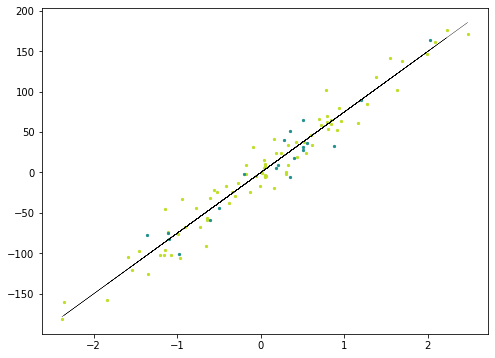

In [59]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))

m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=5)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=5)

# Predicted line
plt.plot(X, y_pred_line, color='black', linewidth=0.2, label='Prediction')
plt.show()